*House Pricing*

*Fase 1 - Pré-processamento e transformação*

**Grupo:** 
* Carlos Gabriel de Freitas - 19.1.4009
* Gabriel Mace dos Santos Ferreira - 19.1.4013
* Filipe Ramos de Souza Santo - 19.1.4027

**Disciplina:** Mineração de Dados (BCC444)

**Professor:** Anderson Almeida Ferreira

In [1]:
import sklearn
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib_inline
import matplotlib.pyplot as plt

from copy import copy
from sklearn.preprocessing import OneHotEncoder

In [2]:
# Carregando o dataset de treino
df = pd.read_csv("./train.csv")
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


## Análise descritiva

In [3]:
attributes = [
    {
        'name': 'Id',
        'category': 'ordinal_categorical',
        'description': 'Identificação de cada residência no data sheet',
    },
    {
        'name': 'MSSubClass',
        'category': 'nominal_categorical',
        'description': 'Identifica a classificação geral do zoneamento da venda',
    },
    {
        'name': 'MSZoning',
        'category': 'nominal_categorical',
        'description': 'Identifica a classificação geral do zoneamento da venda',
    },
    {
        'name': 'LotFrontage',
        'category': 'continuous_numerical',
        'description': 'Comprimento total das ruas conectadas à propriedade (medido em Linear Feet)',
    },
    {
        'name': 'LotArea',
        'category': 'continuous_numerical',
        'description': 'Área do lote (medido em Square Feet)',
    },
    {
        'name': 'Street',
        'category': 'symmetric_binary',
        'description': 'Tipo de rua de acesso a propriedade',
    },
    {
        'name': 'Alley',
        'category': 'nominal_categorical',
        'description': 'Tipo de beco de acesso à propriedade',
    },
    {
        'name': 'LotShape',
        'category': 'nominal_categorical',
        'description': 'Formato geral da propriedade',
    },
    {
        'name': 'LandContour',
        'category': 'nominal_categorical',
        'description': 'Planicidade da propriedade',
    },
    {
        'name': 'Utilities',
        'category': 'ordinal_categorical',
        'description': 'Tipos de utilidades disponiveis',
    },
    {
        'name': 'LotConfig',
        'category': 'nominal_categorical',
        'description': 'Configuração do lote',
    },
    {
        'name': 'LandSlope',
        'category': 'nominal_categorical',
        'description': 'Inclinação da propriedade',
    },
    {
        'name': 'Neighborhood',
        'category': 'nominal_categorical',
        'description': 'Localizações físicas dentro dos limites da cidade de Ames',
    },
    {
        'name': 'Condition1',
        'category': 'nominal_categorical',
        'description': 'Proximidade da residência à diferentes condições na cidade',
    },
    {
        'name': 'Condition2',
        'category': 'nominal_categorical',
        'description': 'Proximidade da residência à diferentes condições na cidade (caso mais de uma esteja presente)',
    },
    {
        'name': 'BldgType',
        'category': 'nominal_categorical',
        'description': 'Tipo de habitação',
    },
    {
        'name': 'HouseStyle',
        'category': 'nominal_categorial',
        'description': 'Estilo da habitação',
    },
    {
        'name': 'OverallQual',
        'category': 'ordinal_categorical',
        'description': 'Avalia o material total e o acabamento da casa',
    },
    {
        'name': 'OverallCond',
        'category': 'ordinal_categorical',
        'description': 'Avalia a condição geral da casa',
    },
    {
        'name': 'YearBuilt',
        'category': 'discrete_numerical',
        'description': 'Data em que a casa foi construída',
    },
    {
        'name': 'YearRemodAdd',
        'category': 'discrete_numerical',
        'description':'Data em que a casa foi remodelada (idêntico à data de construção se não houverem remodelações ou acréscimos à residência)',
    },
    {
        'name': 'RoofStyle',
        'category': 'nominal_categorical',
        'description': 'Tipo de telhado',
    },
    {
        'name': 'RoofMatl',
        'category': 'nominal_categorical',
        'description': 'Material do telhado',
    },
    {
        'name': 'Exterior1st',
        'category': 'nominal_categorical',
        'description': 'Revestimento exterior em casa',
    },
    {
        'name': 'Exterior2nd',
        'category': 'nominal_categorical',
        'description': 'Revestimento exterior em casa (se há mais de um material)',
    },
    {
        'name': 'MasVnrType',
        'category': 'nominal_categorical',
        'description': 'Tipo de folheado da alvenaria',
    },
    {
        'name': 'MasVnrArea',
        'category': 'continuous_numerical',
        'description': 'Área de folheado da alvenaria (medido em Square Feet)',
    },
    {
        'name': 'ExterQual',
        'category': 'ordinal_categorical',
        'description': 'Avalia a qualidade do material no exterior da casa'
    },
    {
        'name': 'ExterCond',
        'category': 'ordinal_categorical',
        'description': 'Avalia a condição atual do material no exterior da casa',
    },
    {
        'name': 'Foundation',
        'category': 'nominal_categorical',
        'description': 'Tipo de fundação da casa',
    },
    {
        'name': 'BsmtQual',
        'category': 'ordinal_categorical',
        'description': 'Avalia a altura do porão',
    },
    {
        'name': 'BsmtCond',
        'category': 'ordinal_categorical',
        'description': 'Avalia a condição geral do porão',
    },
    {
        'name': 'BsmtExposure',
        'category': 'ordinal_categorical',
        'description': 'Refere-se a walkout ou paredes no nível do jardim',
    },
    {
        'name': 'BsmtFinType1',
        'category': 'ordinal_categorical',
        'description': 'Classificação da área finalizada do porão'
    },
    {
        'name': 'BsmtFinSF1',
        'category': 'discrete_numerical',
        'description': 'Área finalizada Tipo 1 (medida em Square Feet)',
    },
    {
        'name': 'BsmtFinType2',
        'category': 'ordinal_categorical',
        'description': 'Classificação da área finalizada do porão (caso tenham múltiplos tipos)',
    },
    {
        'name': 'BsmtFinSF2',
        'category': 'discrete_numerical',
        'description': 'Área finalizada Tipo 2 (medida em Square Feet)',
    },
    {
        'name': 'BsmtUnfSF',
        'category': 'discrete_numerical',
        'description': 'Área não finalizada do porão (medida em Square Feet)',
    },
    {
        'name': 'TotalBsmtSF',
        'category': 'discrete_numerical',
        'description': 'Área total do porão (medida em Square Feet)',
    },
    {
        'name': 'Heating',
        'category': 'nominal_categorical',
        'description': 'Tipo de Aquecimento',
    },
    {
        'name': 'HeatingQC',
        'category': 'ordinal_categorical',
        'description': 'Qualidade e condição do aquecimento',
    },
    {
        'name': 'CentralAir',
        'category': 'asymmetric_binary',
        'description': 'Ar condicionado central',
    },
    {
        'name': 'Electrical',
        'category': 'nominal_categorical',
        'description': 'Sistema elétrico',
    },
    {
        'name': '1stFlrSF',
        'category': 'discrete_numerical',
        'description': 'Área do primeiro andar (medido em Square Feet)',
    },
    {
        'name': '2ndFlrSF',
        'category': 'discrete_numerical',
        'description': 'Área do segundo andar (medida em Square Feet)',
    },
    {
        'name': 'LowQualFinSF',
        'category': 'discrete_numerical',
        'description': 'Área finalizada em baixa qualidade (medida em Square Feet)',
    },
    {
        'name': 'GrLivArea',
        'category': 'discrete_numerical',
        'description': 'Área habitável acima do nível do solo (medida em Square Feet)',
    },
    {
        'name': 'BsmtFullBath',
        'category': 'discrete_numerical',
        'description': 'Número de banheiros no porão',
    },
    {
        'name': 'BsmtHalfBath',
        'category': 'discrete_numerical',
        'description': 'Número de banheiros de hóspede no porão',
    },
    {
        'name': 'FullBath',
        'category': 'discrete_numerical',
        'description': 'Número de banheiros',
    },
    {
        'name': 'HalfBath',
        'category': 'discrete_numerical',
        'description': 'Número de banheiros de hóspede',
    },
    {
        'name': 'BedroomAbvGr',
        'category': 'discrete_numerical',
        'description': 'Número de quartos acima do nível do solo (Não inclui quartos no porão)',
    },
    {
        'name': 'KitchenAbvGr',
        'category': 'discrete_numerical',
        'description': 'Número de cozinhas acima do nível do solo',
    },
    {
        'name': 'KitchenQual',
        'category': 'ordinal_categorical',
        'description': 'Qualidade da cozinha',
    },
    {
        'name': 'TotRmsAbvGrd',
        'category': 'discrete_numerical',
        'description': 'Número total de cômodos acima do nível do solo (não inclui banheiros)',
    },
    {
        'name': 'Functional',
        'category': 'nominal_categorical',
        'description': 'Funcionalidade da residência (É assumida funcionalidade típica até serem requisitadas investigações)',
    },
    {
        'name': 'Fireplaces',
        'category': 'discrete_numerical',
        'description': 'Número de lareiras na residência',
    },
    {
        'name': 'FireplaceQu',
        'category': 'ordinal_categorical',
        'description': 'Qualidade das lareiras',
    },
    {
        'name': 'GarageType',
        'category': 'nominal_categorical',
        'description': 'Localização da garagem',
    },
    {
        'name': 'GarageYrBlt',
        'category': 'discrete_numerical',
        'description': 'Ano de construção da garagem',
    },
    {
        'name': 'GarageFinish',
        'category': 'ordinal_categorical',
        'description': 'Acabamento interno da garagem',
    },
    {
        'name': 'GarageCars',
        'category': 'discrete_numerical',
        'description': 'Tamanho da garagem (medida em capacidade para armazenar carros)',
    },
    {
        'name': 'GarageArea',
        'category': 'discrete_numerical',
        'description': 'Tamanho da garagem (medida em Square Feet)',
    },
    {
        'name': 'GarageQual',
        'category': 'ordinal_categorical',
        'description': 'Qualidade da garagem',
    },
    {
        'name': 'GarageCond',
        'category': 'ordinal_categorical',
        'description': 'Condição da garagem',
    },
    {
        'name': 'PavedDrive',
        'category': 'nominal_categorical',
        'description': 'Pavimento da entrada da garagem',
    },
    {
        'name': 'WoodDeckSF',
        'category': 'discrete_numerical',
        'description': 'Área do deck de madeira (medida em Square Feet)',
    },
    {
        'name': 'OpenPorchSF',
        'category': 'discrete_numerical',
        'description': 'Área da varanda aberta (medida em Square Feet)',
    },
    {
        'name': 'EnclosedPorch',
        'category': 'discrete_numerical',
        'description': 'Área da varanda fechada (medida em Square Feet)',
    },
    {
        'name': '3SsnPorch',
        'category': 'discrete_numerical',
        'description': 'Área da varanda de três estações(medida em Square Feet)',
    },
    {
        'name': 'ScreenPorch',
        'category': 'discrete_numerical',
        'description': 'Área da varanda com telas (medida em Square Feet)',
    },
    {
        'name': 'PoolArea',
        'category': 'discrete_numerical',
        'description': 'Área da piscina (medida em Square Feet)',
    },
    {
        'name': 'PoolQC',
        'category': 'ordinal_categorical',
        'description': 'Qualidade da piscina',
    },
    {
        'name': 'Fence',
        'category': 'ordinal_categorical',
        'description': 'Qualidade da cerca',
    },
    {
        'name': 'MiscFeature',
        'category': 'nominal_categorical',
        'description': 'Recurso variado que não se encaixa em outras categorias',
    },
    {
        'name': 'MiscVal',
        'category': 'continuous_numerical',
        'description': 'Valor monetário do recurso variado (medido em $)',
    },
    {
        'name': 'MoSold',
        'category': 'discrete_numerical',
        'description': 'Mês de venda (MM)',
    },
    {
        'name': 'YrSold',
        'category': 'discrete_numerical',
        'description': 'Ano de venda (YYYY)',
    },
    {
        'name': 'SaleType',
        'category': 'nominal_categorical',
        'description': 'Tipo da venda',
    },
    {
        'name': 'SaleCondition',
        'category': 'nominal_categorical',
        'description': 'Condição para venda',
    },
    {
        'name': 'SalePrice',
        'category': 'continuous_numerical',
        'description': 'Valor da venda (medido em $)',
    },
]

In [4]:
# Imprimindo as informações de cada atributo
for attribute in attributes:
    print(f"{attribute['name']}")
    print("Categoria: ", end = "")

    if attribute["category"] == "nominal_categorical":
        print("Categórico Nominal")
    elif attribute["category"] == "ordinal_categorical":
        print("Categórico Ordinal")
    elif attribute["category"] == "discrete_numerical":
        print("Numérico Discreto")
    elif attribute["category"] == "continuous_numerical":
        print("Numérico Contínuo")
    elif attribute["category"] == "symmetric_binary":
        print("Binário Simétrico")
    elif attribute["category"] == "asymmetric_binary":
        print("Binário Assimétrico")

    print(f"Descrição: {attribute['description']}")
    print(f"Exemplos de valores: {df[attribute['name']].unique()[:5]}\n")

Id
Categoria: Categórico Ordinal
Descrição: Identificação de cada residência no data sheet
Exemplos de valores: [1 2 3 4 5]

MSSubClass
Categoria: Categórico Nominal
Descrição: Identifica a classificação geral do zoneamento da venda
Exemplos de valores: [ 60  20  70  50 190]

MSZoning
Categoria: Categórico Nominal
Descrição: Identifica a classificação geral do zoneamento da venda
Exemplos de valores: ['RL' 'RM' 'C (all)' 'FV' 'RH']

LotFrontage
Categoria: Numérico Contínuo
Descrição: Comprimento total das ruas conectadas à propriedade (medido em Linear Feet)
Exemplos de valores: [65. 80. 68. 60. 84.]

LotArea
Categoria: Numérico Contínuo
Descrição: Área do lote (medido em Square Feet)
Exemplos de valores: [ 8450  9600 11250  9550 14260]

Street
Categoria: Binário Simétrico
Descrição: Tipo de rua de acesso a propriedade
Exemplos de valores: ['Pave' 'Grvl']

Alley
Categoria: Categórico Nominal
Descrição: Tipo de beco de acesso à propriedade
Exemplos de valores: [nan 'Grvl' 'Pave']

LotSh

In [5]:
# Compondo listas contendo os nomes dos atributos de cada categoria
nominal_categorical = []
ordinal_categorical = []
discrete_numerical = []
continuous_numerical = []
symmetric_binary = []
asymmetric_binary = []

for attribute in attributes:
    if attribute["category"] == "nominal_categorical":
        nominal_categorical.append(attribute['name'])
    elif attribute["category"] == "ordinal_categorical":
        ordinal_categorical.append(attribute['name'])
    elif attribute["category"] == "discrete_numerical":
        discrete_numerical.append(attribute['name'])
    elif attribute["category"] == "continuous_numerical":
        continuous_numerical.append(attribute['name'])
    elif attribute["category"] == "symmetric_binary":
        symmetric_binary.append(attribute['name'])
    elif attribute["category"] == "asymmetric_binary":
        asymmetric_binary.append(attribute['name'])

In [6]:
# Justificativa de cada categoria de atributo
print('Justificativas:\n')
print("Categórico Nominal: o atributo é qualitativo e identifica algo (como um nome).")
print("Categórico Ordinal: o atributo é qualitativo, identifica algo e possui uma ordem.")
print("Numérico Discreto: o atributo é quantitativo e assume valores discretos (inteiros).")
print("Numérico Contínuo: o atributo é quantitativo e assume valores contínuos (reais).")
print("Binário Simétrico: o atributo assume apenas 2 valores que possuem a mesma importância.")
print("Binário Assimétrico: o atributo assume apenas 2 valores que não possuem a mesma importância.")

Justificativas:

Categórico Nominal: o atributo é qualitativo e identifica algo (como um nome).
Categórico Ordinal: o atributo é qualitativo, identifica algo e possui uma ordem.
Numérico Discreto: o atributo é quantitativo e assume valores discretos (inteiros).
Numérico Contínuo: o atributo é quantitativo e assume valores contínuos (reais).
Binário Simétrico: o atributo assume apenas 2 valores que possuem a mesma importância.
Binário Assimétrico: o atributo assume apenas 2 valores que não possuem a mesma importância.


In [7]:
def numerical_attribute_statistics(df, attribute):
    attribute_name = attribute['name']
    print(f"Atributo: {attribute_name}")
    print(f'Intervalo de Valores = [{df[attribute_name].min()} ~ {df[attribute_name].max()}]')
    print(f'Valor Médio = {df[attribute_name].mean()}')
    print(f'Valor Mínimo = {df[attribute_name].min()}')
    print(f'Valor Máximo = {df[attribute_name].max()}')
    print(f'Desvio Padrão = {df[attribute_name].std()}\n')

In [8]:
# Imprimindo informações sobre os atributos numéricos
numerical_categories = ['discrete_numerical', 'continuous_numerical']
for atribute in attributes:
    if atribute.get('category') in numerical_categories:
        numerical_attribute_statistics(df, attribute)

Atributo: SalePrice
Intervalo de Valores = [34900 ~ 755000]
Valor Médio = 180921.19589041095
Valor Mínimo = 34900
Valor Máximo = 755000
Desvio Padrão = 79442.50288288662

Atributo: SalePrice
Intervalo de Valores = [34900 ~ 755000]
Valor Médio = 180921.19589041095
Valor Mínimo = 34900
Valor Máximo = 755000
Desvio Padrão = 79442.50288288662

Atributo: SalePrice
Intervalo de Valores = [34900 ~ 755000]
Valor Médio = 180921.19589041095
Valor Mínimo = 34900
Valor Máximo = 755000
Desvio Padrão = 79442.50288288662

Atributo: SalePrice
Intervalo de Valores = [34900 ~ 755000]
Valor Médio = 180921.19589041095
Valor Mínimo = 34900
Valor Máximo = 755000
Desvio Padrão = 79442.50288288662

Atributo: SalePrice
Intervalo de Valores = [34900 ~ 755000]
Valor Médio = 180921.19589041095
Valor Mínimo = 34900
Valor Máximo = 755000
Desvio Padrão = 79442.50288288662

Atributo: SalePrice
Intervalo de Valores = [34900 ~ 755000]
Valor Médio = 180921.19589041095
Valor Mínimo = 34900
Valor Máximo = 755000
Desvio Pa

In [9]:
# Separando os atributos discretos em grupos de acordo com o valor máximo apresentado
group_1 = []
group_2 = []
group_3 = []
group_4 = []
group_5 = []

for attribute in discrete_numerical:
    max_value = df[attribute].max()
    if max_value <= 100:
        group_1.append(attribute)
    elif max_value <= 500:
        group_2.append(attribute)
    elif max_value <= 1000:
        group_3.append(attribute)
    elif max_value <= 2000:
        group_4.append(attribute)
    else:
        group_5.append(attribute)

<Axes: >

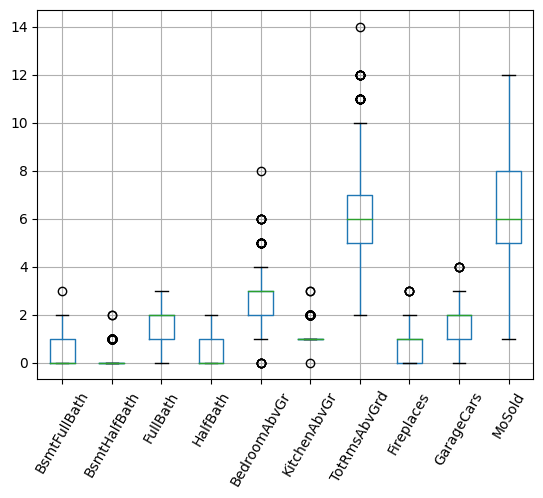

In [10]:
df.boxplot(column = group_1, rot = 60, fontsize = 10)

<Axes: >

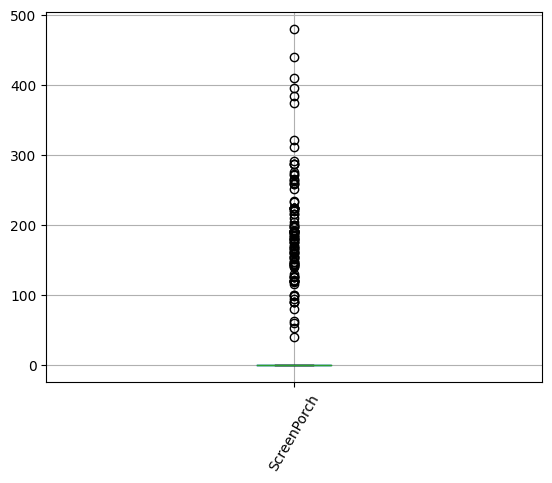

In [11]:
df.boxplot(column = group_2, rot = 60, fontsize = 10)

<Axes: >

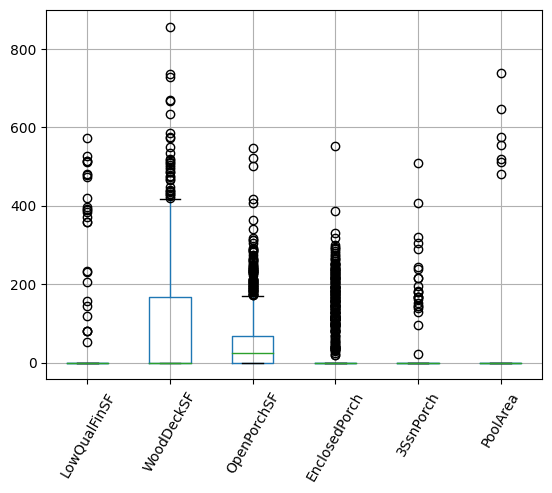

In [12]:
df.boxplot(column = group_3, rot = 60, fontsize = 10)

<Axes: >

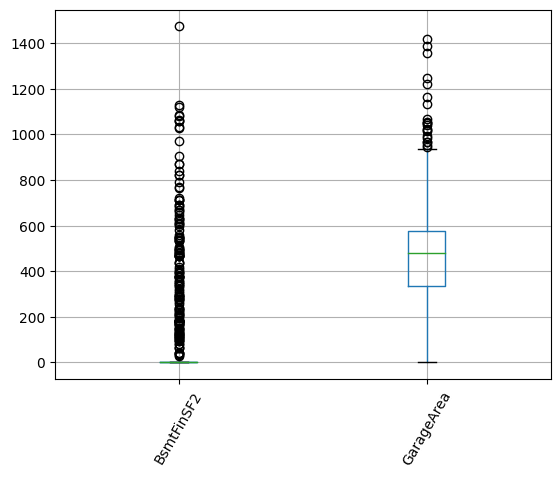

In [13]:
df.boxplot(column = group_4, rot = 60, fontsize = 10)

<Axes: >

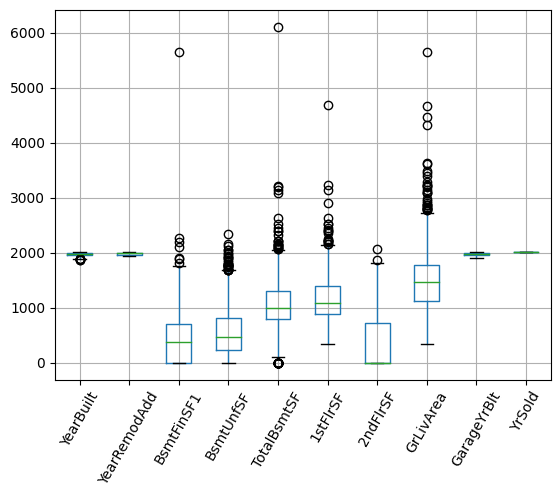

In [14]:
df.boxplot(column = group_5, rot = 60, fontsize = 10)

In [15]:
# Cada atributo contínuo será plotado individualmente devido a
# - pequena quantidade de atributos contínuos;
# - grande disparidade nos intervalos de valores de tais atributos.
continuous_numerical

['LotFrontage', 'LotArea', 'MasVnrArea', 'MiscVal', 'SalePrice']

<Axes: >

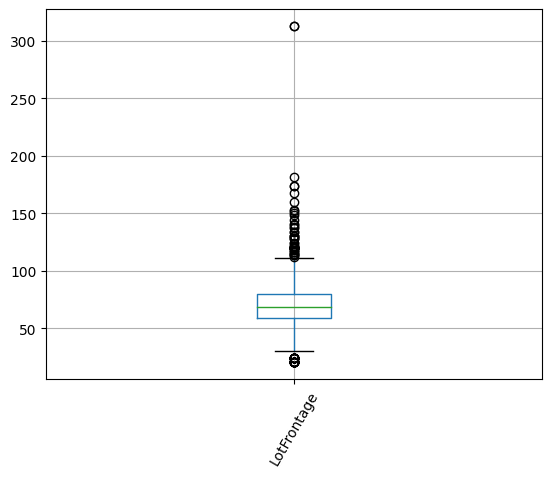

In [16]:
df.boxplot(column = ['LotFrontage'], rot = 60, fontsize = 10)

<Axes: >

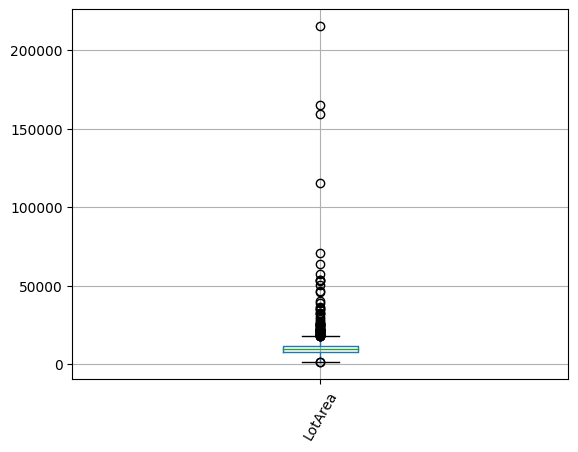

In [17]:
df.boxplot(column = ['LotArea'], rot = 60, fontsize = 10)

<Axes: >

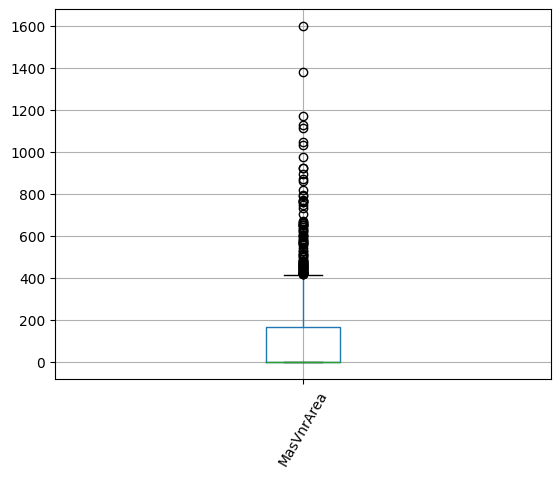

In [18]:
df.boxplot(column = ['MasVnrArea'], rot = 60, fontsize = 10)

<Axes: >

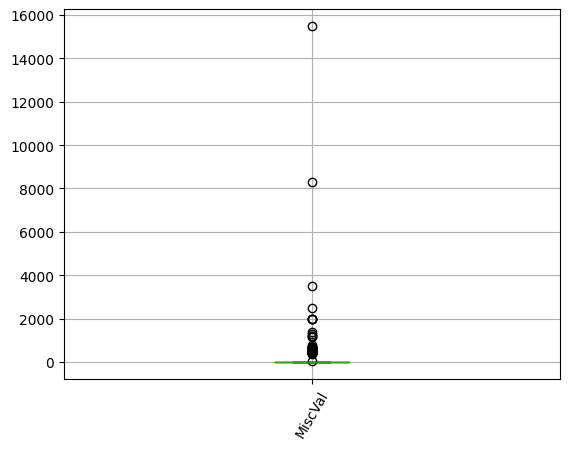

In [19]:
df.boxplot(column = ['MiscVal'], rot = 60, fontsize = 10)

<Axes: >

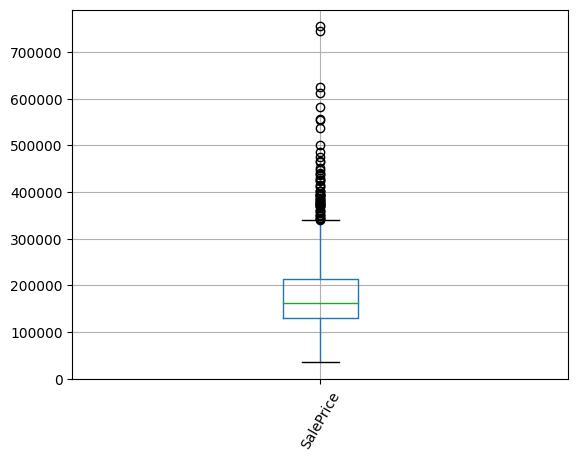

In [20]:
df.boxplot(column = ['SalePrice'], rot = 60, fontsize = 10)

In [35]:
# Identificação dos valores ausentes, aberrantes e inconsistências
#outlier_attributes = []
print(f"Quantidade de Valores Ausentes para cada atributo: \n{df.isnull().sum()}\n")

# for attribute in list(outlier_attributes):
#   print(f'Alguns Valores presentes no atributo {attribute}: {df[attribute].unique()[:5]}\n')

Quantidade de Valores Ausentes para cada atributo: 
Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64



In [85]:
#print(df.loc[(df['HouseStyle'] == '1.5Fin') & (df['2ndFlrSF'] == 0)])

#print(df.loc[(df['LandContour'] == 'Lvl') & (df['LandSlope'] == 'Sev')]) #(Pra mim não faz sentido)

#print(df.loc[(df['LandContour'] == 'HLS') & (df['LandSlope'] == 'Gtl')]) #(Pra mim não faz sentido)

#print(df.loc[(df['LandContour'] == 'Low') & (df['LandSlope'] == 'Gtl')]) #(Pra mim não faz sentido)


        Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape   
53      54          20       RL         68.0    50271   Pave   NaN      IR1  \
396    397          20       RL         60.0     7200   Pave   NaN      Reg   
789    790          60       RL          NaN    12205   Pave   NaN      IR1   
943    944          90       RL        100.0    25000   Pave   NaN      Reg   
1049  1050          20       RL         60.0    11100   Pave   NaN      Reg   
1061  1062          30  C (all)        120.0    18000   Grvl   NaN      Reg   
1161  1162          20       RL          NaN    14778   Pave   NaN      IR1   
1283  1284          90       RL         94.0     9400   Pave   NaN      Reg   
1348  1349          20       RL          NaN    16196   Pave   NaN      IR3   

     LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal   
53           Low    AllPub  ...        0    NaN   NaN         NaN       0  \
396          Low    AllPub  ...        0    NaN   NaN  

# A resposta abaixo fiquei em dúvida se seria melhor deixar dessa forma geral, ou fazer de forma especifica citando cada valor máximo/minimo das variáveis

A partir da análise dos gráficos de boxplot é possível afirmar que existem outliers para todas as variáveis, com excessão das variáveis MOSold, GarageYrBlt e YrSold, em situações que que superam o valor máximo previamente identificado durante a plotagem do boxplot. Vale ressaltar que em certas situações como nas variáveis BedroomAbvGr, KitchenAbvGr, YearBuilt, TotalBsmtSF, LotFrontage, LotArea os outliers também ocorrem em valores menores que o mínimo.

In [22]:
def probability(qtd, total):
  return qtd/total

In [23]:
discrete_categories = ['discrete_numerical', 'nominal_categorical', 'ordinal_categorical', 'symetric_binary', 'assymetric_binary']
for atribute in attributes:
    if atribute.get('category') in discrete_categories:
        print(f"Valores possíveis para {atribute.get('name')}: {df[atribute.get('name')].unique()}\n\n")

Valores possíveis para Id: [   1    2    3 ... 1458 1459 1460]


Valores possíveis para MSSubClass: [ 60  20  70  50 190  45  90 120  30  85  80 160  75 180  40]


Valores possíveis para MSZoning: ['RL' 'RM' 'C (all)' 'FV' 'RH']


Valores possíveis para Alley: [nan 'Grvl' 'Pave']


Valores possíveis para LotShape: ['Reg' 'IR1' 'IR2' 'IR3']


Valores possíveis para LandContour: ['Lvl' 'Bnk' 'Low' 'HLS']


Valores possíveis para Utilities: ['AllPub' 'NoSeWa']


Valores possíveis para LotConfig: ['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3']


Valores possíveis para LandSlope: ['Gtl' 'Mod' 'Sev']


Valores possíveis para Neighborhood: ['CollgCr' 'Veenker' 'Crawfor' 'NoRidge' 'Mitchel' 'Somerst' 'NWAmes'
 'OldTown' 'BrkSide' 'Sawyer' 'NridgHt' 'NAmes' 'SawyerW' 'IDOTRR'
 'MeadowV' 'Edwards' 'Timber' 'Gilbert' 'StoneBr' 'ClearCr' 'NPkVill'
 'Blmngtn' 'BrDale' 'SWISU' 'Blueste']


Valores possíveis para Condition1: ['Norm' 'Feedr' 'PosN' 'Artery' 'RRAe' 'RRNn' 'RRAn' 'PosA' 'RRNe']


Valores poss

In [24]:
for atribute in attributes:
    if atribute.get('category') in discrete_categories:
        print(f"Atributo: {atribute.get('name')}")
        for value in df[atribute.get("name")].unique():
            try:
                print(f"Probabilidade de {value}: {probability(df[atribute.get('name')].value_counts()[value], len(df.index))}")
            except:
                continue
        print("\n")

Atributo: Id
Probabilidade de 1: 0.0006849315068493151
Probabilidade de 2: 0.0006849315068493151
Probabilidade de 3: 0.0006849315068493151
Probabilidade de 4: 0.0006849315068493151
Probabilidade de 5: 0.0006849315068493151
Probabilidade de 6: 0.0006849315068493151
Probabilidade de 7: 0.0006849315068493151
Probabilidade de 8: 0.0006849315068493151
Probabilidade de 9: 0.0006849315068493151
Probabilidade de 10: 0.0006849315068493151
Probabilidade de 11: 0.0006849315068493151
Probabilidade de 12: 0.0006849315068493151
Probabilidade de 13: 0.0006849315068493151
Probabilidade de 14: 0.0006849315068493151
Probabilidade de 15: 0.0006849315068493151
Probabilidade de 16: 0.0006849315068493151
Probabilidade de 17: 0.0006849315068493151
Probabilidade de 18: 0.0006849315068493151
Probabilidade de 19: 0.0006849315068493151
Probabilidade de 20: 0.0006849315068493151
Probabilidade de 21: 0.0006849315068493151
Probabilidade de 22: 0.0006849315068493151
Probabilidade de 23: 0.0006849315068493151
Probabi

In [25]:
print(f"Quantidade de Valores Ausentes para cada atributo: \n{df.isnull().sum()}\n")

Quantidade de Valores Ausentes para cada atributo: 
Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64



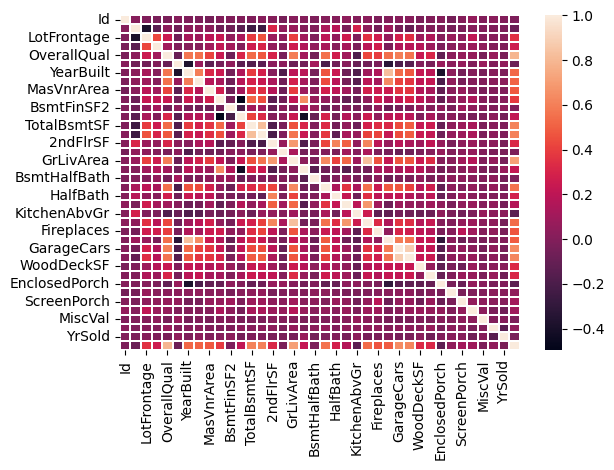

In [26]:
correlation = df.corr(numeric_only=True)
sn.heatmap(correlation, annot = False, linewidths=.1, square=False)
plt.tight_layout()
plt.show()

# Questão 1.e

<Axes: >

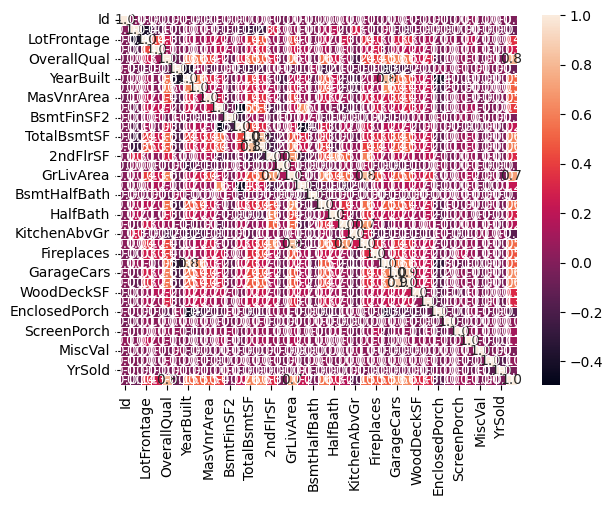

In [27]:
correlation = df.corr(numeric_only=True)
plot = sn.heatmap(correlation, annot = True, fmt=".1f", linewidths=.6)
plot

Primeiramente, os valores dos coeficientes de correlação de Pearson apresentados no mapa de calor dizem o quão correlacionados dois atributos são: quanto mais próximos de 1 ou -1 o coeficiente for, mais correlacionados são os atributos.

É possível observar no mapa de calor que os atributos que possuem a maior correlação são o valor pago pelo bilhete do Titanic e a classe do alojamento. Dado que, os assentos presentes na primeira classse, usualmente, são mais caros quando comparados com os assentos da terceira classe.

Também vemos uma correlação entre a quantidade de irmãos e esposas, com a quantidade de pais e filhos que um individuo tem abordo no navio. Isso pode acontecer pois muito indivíduos poderiam estar fazendo uma viagem em família.

E por último, temos uma correlação entre a idade do individuo e a classe de seu alojamento. Para essa, não conseguimos identificar uma explicação para a correlação.

#Questão 2.a

In [28]:
df['Cabin'] = df['Cabin'].fillna('')
df['Age'] = df['Age'].fillna(df['Age'].mean())
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode())

KeyError: 'Cabin'

O conjunto de dados possui três colunas que contêm valores nulos: **cabin**, **age**, e **embarked**. Então somente foi tratado esses valores.

Para o atributo **cabin** foi substituído os valores nulos por uma string vazia, já que o atributo é uma string que não possui um padrão.

Para o atributo **age** o valor substituído sob os nulos foi a média da idade.

E para o atributo **embarked**, os valores nulos foram substituídos pela moda dos valores no conjunto de dados.

# Questão 2.b

In [ ]:
pd.cut(df.Fare, bins=3, right=True)

O único atributo que possui ruído é o **fare** que representa o preço dos bilhetes. Como o navio possui três classes, então dividimos os preços em três categorias eliminando assim qualquer ruído.

# Questão 2.c

A inconsistência presente no atributo Ticket não pode ser solucionada dado que seria extremamente custoso a padronização de todos os valores, além disso esse atributo não afeta a análise à ser realizada posteriormente.

In [ ]:
df[df['Fare'] == 0]

In [ ]:
def medium_fare(pclass):
  return df[df['Pclass'] == pclass]['Fare'].mean()

print(f'Preço médio do bilhete da classe 1: {medium_fare(1)}')
print(f'Preço médio do bilhete da classe 2: {medium_fare(2)}')
print(f'Preço médio do bilhete da classe 3: {medium_fare(3)}')

In [ ]:
pclasses = [1, 2, 3]

for pclass in pclasses:
  mean = medium_fare(pclass)
  df.loc[(df['Fare'] == 0) & (df['Pclass'] == pclass)].replace(0, mean)

A inconsistência presente no atributo Fare foi solucionada a partir da média dos valores pagos por individuos com o mesmo tipo de classe da passagem, para então substituir aqueles que se encontram zerados.

# Questão 2.d

In [ ]:
nominal_attributes = []

for index, row in df.iterrows():
  nominal_attributes.append([row["Name"], row["Ticket"], row["Cabin"]])

nominal_attributes = OneHotEncoder().fit_transform(df).toarray()
print(f'Vetor numérico contendo a transformação dos atributos categóricos nominais: {nominal_attributes}')

# Questão 2.e

O atributo **PassengerId** não necessita de uma transformação para ser interpretado como um atributo numérico, já que ele identifica unicamente cada indivíduo, começando pelo valor 1 e sendo incrementado em 1 para cada registro.

Similiarmente, o atributo **Pclass** também não necessita de uma transformação, já que cada classe econômica é representada por um número do intervalo [1, 3], onde 1 é a classe mais alta e 3 é a mais baixa.

In [ ]:
print(f'Tipo da coluna PassengerId: {df["PassengerId"].dtypes}')
print(f'Tipo da coluna Pclass: {df["Pclass"].dtypes}')

# Questão 2.f

In [ ]:
for attribute in numeric_attributes:
  df[attribute] = (df[attribute] - df[attribute].mean()) / df[attribute].std()
  print(f'Exemplos de valores normalizados para a coluna {attribute}: {df[attribute].unique()[:5]}\n')